In this file I'm  going to work on Image Processing Using OpenCV. This file contains basic operations such as lmage Enhancement,Contrast Improvement,Histogram Equalization,Noise Processing,Segmentation and Feature Extractions.

In [2]:
#import required libraries
import cv2
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

Download image from :https://www.researchgate.net/figure/The-cameraman-picture-with-256-256-size_fig3_329563816

In [23]:
#load image
img=cv2.imread('Cameraman.png')
#img=cv2.imread('Cameraman.png',0) #for print only Red channel
img.shape

(648, 648, 3)

In [24]:
#Check image is present or not
print(img)

[[[171 171 171]
  [171 171 171]
  [173 173 173]
  ...
  [167 167 167]
  [167 167 167]
  [167 167 167]]

 [[173 173 173]
  [171 171 171]
  [173 173 173]
  ...
  [167 167 167]
  [169 169 169]
  [167 167 167]]

 [[173 173 173]
  [173 173 173]
  [173 173 173]
  ...
  [167 167 167]
  [167 167 167]
  [167 167 167]]

 ...

 [[141 141 141]
  [141 141 141]
  [141 141 141]
  ...
  [141 141 141]
  [131 131 131]
  [131 131 131]]

 [[139 139 139]
  [139 139 139]
  [139 139 139]
  ...
  [143 143 143]
  [133 133 133]
  [133 133 133]]

 [[143 143 143]
  [143 143 143]
  [141 141 141]
  ...
  [137 137 137]
  [131 131 131]
  [131 131 131]]]


In [26]:
#Print the RGB values of first pixel
img[0,0,:]  #R=171,G=171,B=171 at pixel, pixel values are same at each color plane(it means this is white color)

array([171, 171, 171], dtype=uint8)

In [27]:
#Access any one Color (here i am accessing Red)
img[:,:,0].shape

(648, 648)

In [25]:
cv2.imshow('image',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### Image Enhancement

In [29]:
#Brightness Improvement(linear enhancement)

img=cv2.imread('Cameraman.png',0)  #consider only Red plane
img1=img+100
img1[0,0]

15

In [30]:
img.dtype #unsign integer-8

dtype('uint8')

In [ ]:
cv2.imshow('image1',img1)  

cv2.waitKey(0)
cv2.destroyAllWindows()  #so many pixels are become black

In [40]:
#To avoid this issue,convert it into float
img1=img.astype('float')
img2=img1+50
img2[0,0]  #changed pixel value @ [0,0]

221.0

In [41]:
img[0,0]  #original pixel value @ [0,0]

171

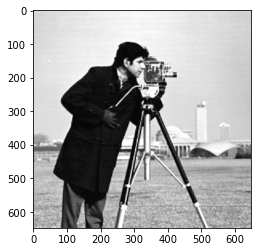

In [42]:
img2[img2>255]=255
#cv2.imshow('img',img2)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(img2,cmap='gray') #here brightness of the image is improved.

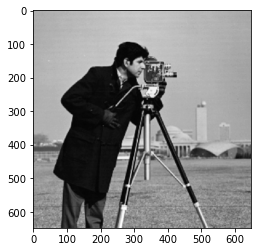

In [43]:
plt.imshow(img,cmap='gray') #This is original image

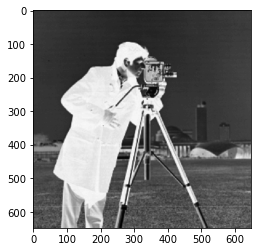

In [49]:
#Contrast improvement(non_linearly enhancemnet)

#here enhancement will not happen linearly
imgn=img/255  #scaled image
img_n1=np.exp(-1*imgn)
plt.imshow(img_n1,cmap='gray')   

<ipython-input-55-d99843f06a16>:2: RuntimeWarning: divide by zero encountered in log10
  img_n1=5*np.log10(imgn)


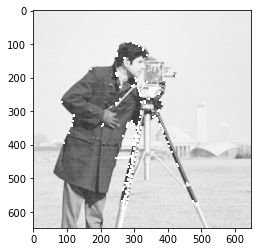

In [55]:
imgn=img/255  #scaled image
img_n1=5*np.log10(imgn)
plt.imshow(img_n1,cmap='gray')   

In [ ]:
#Here court pockets are visible now.

In [58]:
img.shape

(648, 648)

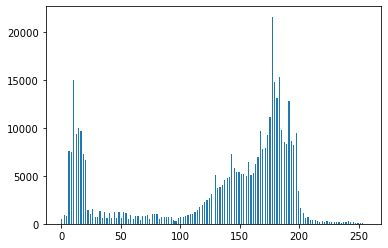

In [61]:
plt.hist(img.ravel(),256,[0,256])
plt.show()

In [ ]:
#Here most of the  pixel value of an image is lies between 100 to 200. 

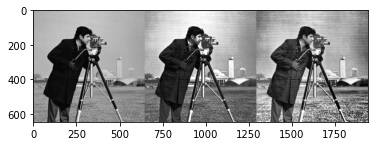

In [66]:
#Histogram Equalization:This method usually increases the global contrast of many images,especially when the image 
#is represented by a narrow range of intensity values.

#Contrast Limited Adaptive Histogram Equalization (CLAHE) to equalize images. CLAHE is a variant of Adaptive histogram 
#equalization (AHE) which takes care of over-amplification of the contrast. CLAHE operates on small regions in the image, 
#called tiles, rather than the entire image. The neighboring tiles are then combined using bilinear interpolation to remove 
#the artificial boundaries.
im_eq=cv2.equalizeHist(img)
ahe=cv2.createCLAHE(clipLimit=10.0,tileGridSize=(4,4))
im_ahe=ahe.apply(img)
res=np.hstack((img,im_eq,im_ahe))

#cv2.imshow('image1',res)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(res,cmap='gray')

In [ ]:
#Third image is good comparatively first two images

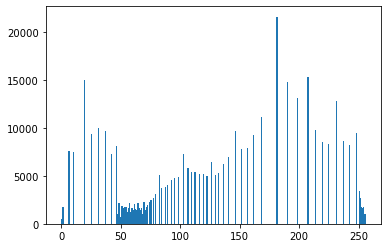

In [67]:
plt.hist(im_eq.ravel(),256,[0,256])
plt.show()

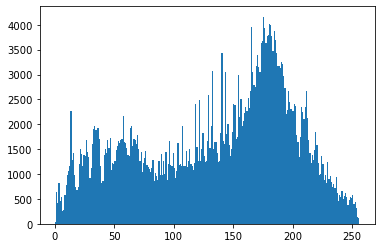

In [68]:
plt.hist(im_ahe.ravel(),256,[0,256])
plt.show()

In [ ]:
#Distribution of an image is structured now, this is called histrogram  equalization.

Now lets start with color image..

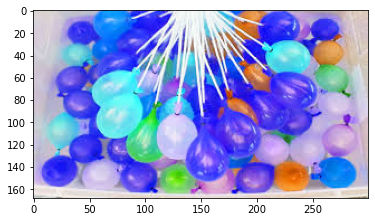

In [69]:
img=cv2.imread('ballons.jfif')
plt.imshow(img )

In [71]:
#print shape of the image
img.shape

(168, 300, 3)

In [72]:
#print first pixel value
img[0,0,:]  #R=218,G=210,B=211

array([218, 210, 211], dtype=uint8)

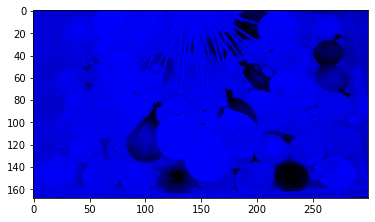

In [76]:
#Print only bluish image
img1=img.copy()
img1[:,:,0]=0
img1[:,:,1]=0
plt.imshow(img1)

In [74]:
img1.shape  #but image will be color only

(168, 300, 3)

#### Noise Processing-Filter

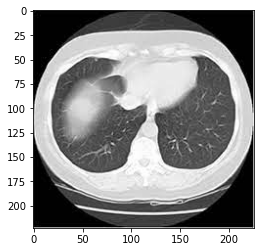

In [81]:
img=cv2.imread('nosiy_lung.jfif')
plt.imshow(img)
plt.show()

In [82]:
#print image shape
img.shape

(223, 226, 3)

In [86]:
img=cv2.imread('nosiy_lung.jfif',0)
kernal=np.ones((5,5),dtype='float')/25  #filter
filt=cv2.filter2D(img,-1,kernal)   
#-1 means zero padding

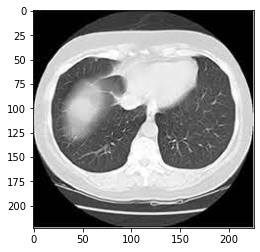

In [87]:
plt.imshow(img,cmap='gray')
plt.show()

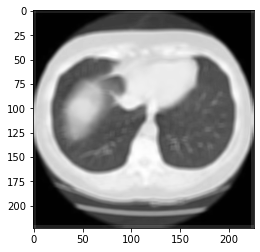

In [88]:
plt.imshow(filt,cmap='gray')
plt.show()

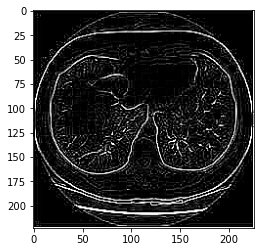

In [3]:
img=cv2.imread('nosiy_lung.jfif',0)
kernal=np.matrix('-1 -1 -1;-1 8 -1;-1 -1 -1')
filt=cv2.filter2D(img,-1,kernal)
plt.imshow(filt,cmap='gray')
plt.show()

### Segmentation

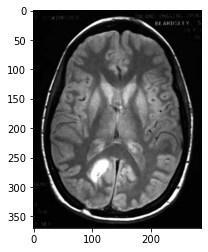

In [97]:
img=cv2.imread('mri_tumor.png',0)
plt.imshow(img,cmap='gray')
plt.show() 

In [98]:
#Now i need need to take tumor separately(here tumor is white part in the image)

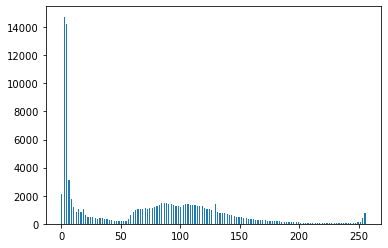

In [99]:
plt.hist(img.ravel(),256,[0,256])
plt.show()

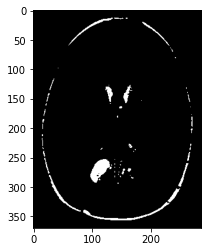

In [100]:
#white part is 255
    
img[img>190]=255
img[img<=200]=0
plt.imshow(img,cmap='gray')
plt.show()

In [101]:
#See here only tumor part is highlighted.

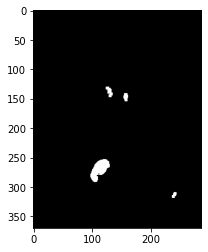

In [103]:
se1=cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))  #first check with (3,3)
mask=cv2.morphologyEx(img,cv2.MORPH_OPEN,se1)
plt.imshow(mask,cmap='gray')

In [ ]:
#here now only shows tumors... Segmentation done..

### Feature Extraction

In [107]:
#Area of the tumor: In an image finding the area of tumor is difficult because in an image tumor shape is uneven.
#but we can find the area by summing only white pixel value

ar=(mask!=0).sum()  
print('Area of the tumor is :',ar)

Area of the tumor is : 995


In [109]:
#Max.Height of tumor

max_h=(mask!=0).sum(axis=0).max()
print('Maximum height of the tumor is:',max_h)

Maximum height of the tumor is: 33


In [110]:
#Max.Weight of tumor

max_w=(mask!=0).sum(axis=1).max()
print('Maximum height of the tumor is:',max_w)

Maximum height of the tumor is: 27


In [111]:
#Eccentricity: ratio between height and weight
eccen=max_h/max_w
print('eccentricity of the tumor:',eccen)

eccentricity of the tumor: 1.2222222222222223


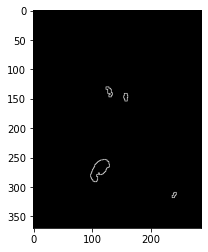

In [112]:
#Perimeter

kernal=np.matrix('-1 -1 -1;-1 8 -1;-1 -1 -1')
filt=cv2.filter2D(mask,-1,kernal)
filt=filt*3
plt.imshow(filt,cmap='gray')
plt.show()  #edges are showing good

In [113]:
peri=(filt!=0).sum()
print('Perimeter of tumor is:',peri)

Perimeter of tumor is: 282


In [117]:
#Centroid
m=cv2.moments(mask)

x_cent=np.round(m['m10']/m['m00'])
y_cent=np.round(m['m01']/m['m00'])
print('x centroid point:',x_cent,',','y centroid point:',y_cent)

x centroid point: 126.0 , y centroid point: 244.0


In [125]:
np.array([ar,max_h,max_w,eccen,peri,x_cent,y_cent])

array([995.        ,  33.        ,  27.        ,   1.22222222,
       282.        , 126.        , 244.        ])

In [ ]:
#For one image we defined seven features.. like if you have 100 tumor images then our dataset will be look like 100*7
#After doing these all, we can easily apply regular machine learning techniques for the classification. 

### Texture features: 

In [127]:
#statistical features(mean,std,skewness,kurtosis,all higher order moment)

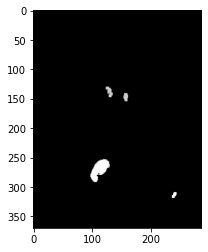

In [132]:
img=cv2.imread('mri_tumor.png',0)
mask=mask/255
mask1=img*mask
plt.imshow(mask1,cmap='gray')
plt.show()   #texture is showing(not visible properly)

In [133]:
#tumor_mean
tum_mean=np.mean(mask1[mask1!=0])
print(tum_mean)

0.9216238053010148


In [134]:
#tumor_std
tum_std=np.std(mask1[mask1!=0])
print(tum_std)

0.0931088414855643


In [138]:
 #tumor_skew
from scipy.stats import skew  
tum_skew=skew(mask1[mask1!=0], axis=0, bias=True)
print(tum_skew)

-0.703194769106051


In [139]:
#tumor_kurtosis
from scipy.stats import kurtosis  
tum_kurt=kurtosis(mask1[mask1!=0], axis=0, bias=True)
print(tum_kurt)

-1.2588424028117264


                                                    ----Thank You----